## Activity of Zebra fish and Malotin

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import dc_stat_think as dcst
import matplotlib.pyplot as plt
%matplotlib inline

#### Getting the data

In [2]:
bout_lengths = pd.read_csv('datasets/gandhi_et_al_bouts.csv',comment='#')

In [3]:
bout_lengths_wt = bout_lengths[bout_lengths.genotype=='wt']['bout_length'].values
bout_lengths_mut = bout_lengths[bout_lengths.genotype=='mut']['bout_length'].values
bout_lengths_het  = bout_lengths[bout_lengths.genotype=='het']['bout_length'].values

In [4]:
print(bout_lengths_wt,bout_lengths_mut)

[3.   3.   4.98 ... 9.   0.96 1.98] [1.98 3.   2.04 ... 1.02 9.   1.02]


#### EDA: Plot ECDFs of active bout length

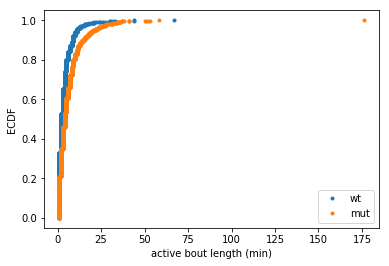

In [5]:
# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')
# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()

###### The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.

#### Parameter estimation: active bout length
Let us compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval.

In [6]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



#### Permutation test: wild type versus heterozygote
We will test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.

In [7]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt,dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0012


Since the p value is too small so we can reject our null hypthesis, that is hetrozygote and wild type bout lengths are not identically distributed

#### Bootstrap hypothesis test
The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, we use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.

In [8]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted,np.mean,size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted,np.mean,size=10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.001


Here too the p value is too small to be considered hence we reject our null hypothesis for means to be equal.

Thus we can conclude that both the species are having different bout lenghts and the chromosome do have affect on bout lenghts.

## Growth of Bacteria

We wil see another dataset of bacterial growth rate. We will use the area of bacteria to measure its growth rate. Here we will see that growth rate is exponential. And we will plot it using logrithmic to approximate the optimal parameters, thus we will use pair bootstrap method.

Pair bootstrap:
    - Resampe data in pairs
    - Compute slope and intercept of resampled data
    - Each slope and intercept is a bootstrap replicate
    - Compute confidence intervals from percentiles of bootstrap replicates

In [9]:
bateria_growth = pd.read_csv('datasets/park_bacterial_growth.csv',comment='#')

In [10]:
t = bateria_growth['time (hr)'].values
bac_area = bateria_growth['bacterial area (sq. microns)'].values

In [11]:
# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log(bac_area)
    
# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t,log_bac_area,1)

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps, log_a0_bs_reps = \
            dcst.draw_bs_pairs_linreg(t, log_bac_area, size=10000)
    
# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps,[2.5,97.5])

# Print the result to the screen
print("""
Growth rate: {0:.4f} sq. µm/hour
95% conf int: [{1:.4f}, {2:.4f}] sq. µm/hour
""".format(growth_rate, *growth_rate_conf_int))


Growth rate: 0.2301 sq. µm/hour
95% conf int: [0.2266, 0.2337] sq. µm/hour



Under these conditions, the bacteria add about 0.23 square micrometers worth of mass each hour. The error bar is very tight, which let us see it graphically.

#### Plotting the growth curve

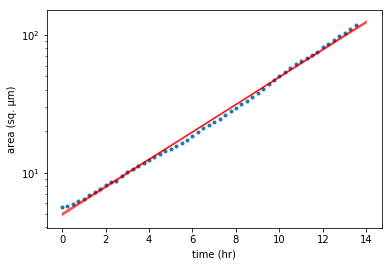

In [12]:
# Plot data points in a semilog-y plot with axis labeles
_ = plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i] * t_bs + log_a0_bs_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
_ = plt.xlabel('time (hr)')
_ = plt.ylabel('area (sq. µm)')
plt.show()


We can see that the bootstrap replicates do not stray much. This is due to the exquisitly exponential nature of the bacterial growth under these experimental conditions.